# Project - Electric Vehicle
## Problem Statement  
Electric Vehicles (EVs) are rapidly transforming the automotive industry, but customers still face uncertainty about real-world range and performance.
## Problem Description
The goal of this project is to predict the range and sales trends of Electric Vehicles based on their specifications such as battery capacity, vehicle type, and model year, and to develop a Generative AI chatbot using models like GPT or Gemini that can answer user queries regarding EV features, sustainability benefits, and future market potential.

# Import Libraries

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset


In [ ]:
# Load Dataset
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")

# Show first five rows
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


# Understand Dataset

In [ ]:
# Dataset shape
df.shape

(177866, 17)

In [ ]:
# Dataset info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
# Summary statistics
df.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,177866,177861,177861,177866,177861.000000,177866.000000,177866,177866,177866,177866,177866.000000,177866.000000,177477.000000,1.778660e+05,177857,177861,1.778610e+05
unique,10830,196,723,46,NaN,NaN,40,139,2,3,NaN,NaN,NaN,NaN,861,76,NaN
top,7SAYGDEE6P,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,1239,92740,29447,177477,NaN,NaN,79659,35989,139210,91950,NaN,NaN,NaN,NaN,4574,65990,NaN
mean,NaN,NaN,NaN,NaN,98172.453506,2020.515512,NaN,NaN,NaN,NaN,58.842162,1073.109363,29.127481,2.202313e+08,NaN,NaN,5.297672e+10
std,NaN,NaN,NaN,NaN,2442.450668,2.989384,NaN,NaN,NaN,NaN,91.981298,8358.624956,14.892169,7.584987e+07,NaN,NaN,1.578047e+09
min,NaN,NaN,NaN,NaN,1545.000000,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.385000e+03,NaN,NaN,1.001020e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2019.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,18.000000,1.814743e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98122.000000,2022.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,33.000000,2.282522e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98370.000000,2023.000000,NaN,NaN,NaN,NaN,75.000000,0.000000,42.000000,2.548445e+08,NaN,NaN,5.305307e+10


# Data Cleaning and Preprocessing

In [ ]:
# Check for missing values
df.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
df.fillna({
    'Electric Range': df['Electric Range'].mean(),
    'Model Year': df['Model Year'].mode()[0],
    'County': df['County'].mode()[0],
    'City': df['City'].mode()[0],
    'Postal Code': df['Postal Code'].mode()[0],
    'Vehicle Location': df['Vehicle Location'].mode()[0],
    'Electric Utility': df['Electric Utility'].mode()[0],
    '2020 Census Tract': df['2020 Census Tract'].mode()[0]
}, inplace=True)


In [ ]:
# Clean categorical columns
df['Make'] = df['Make'].str.strip().str.title()
df['Model'] = df['Model'].str.strip()

In [ ]:
# Cleaned Dataset Shape:
df.shape

(177866, 17)

# Exploratory Data Analysis (EDA)

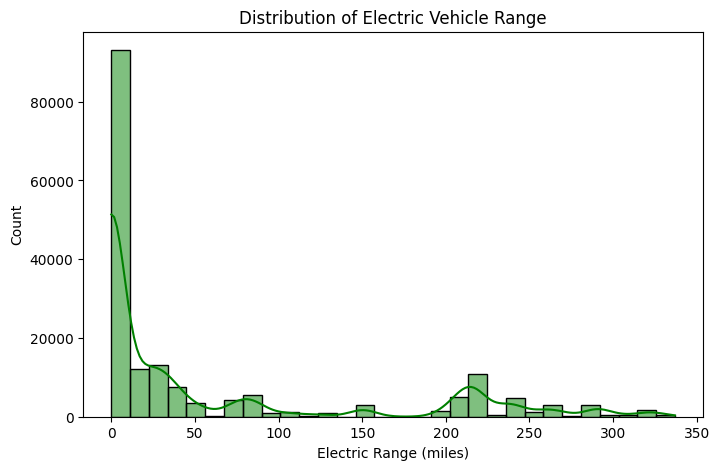

In [ ]:
# Distribution of EV Range
plt.figure(figsize=(8,5))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='green')
plt.title("Distribution of Electric Vehicle Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.show()

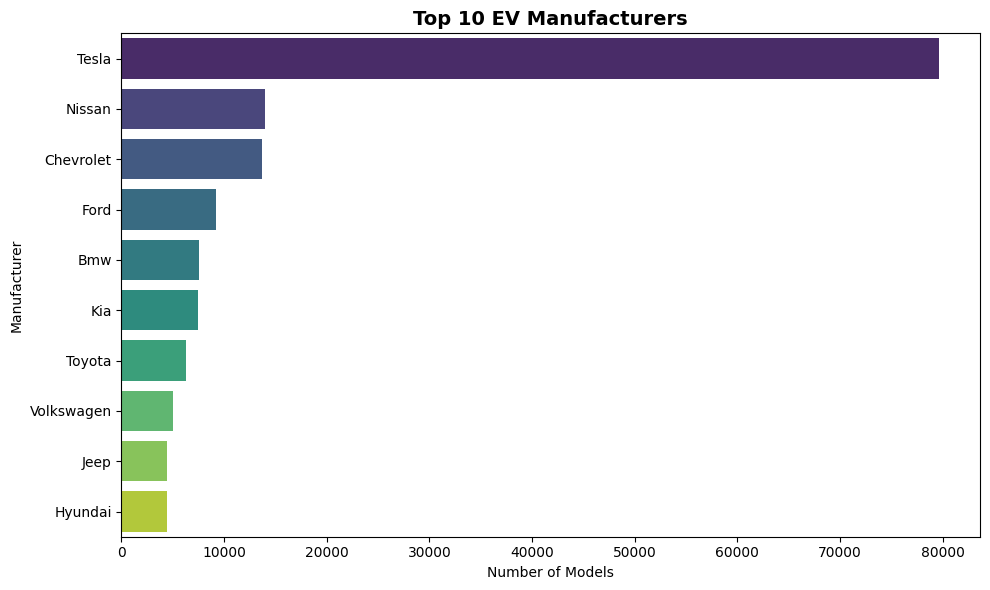

In [ ]:
plt.figure(figsize=(10,6))
top_makes = df['Make'].value_counts().head(10)

sns.barplot(
    x=top_makes.values,
    y=top_makes.index,
    hue=top_makes.index,
    palette='viridis',
    legend=False
)

plt.title("Top 10 EV Manufacturers", fontsize=14, weight='bold')
plt.xlabel("Number of Models")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()


# Insights Extraction

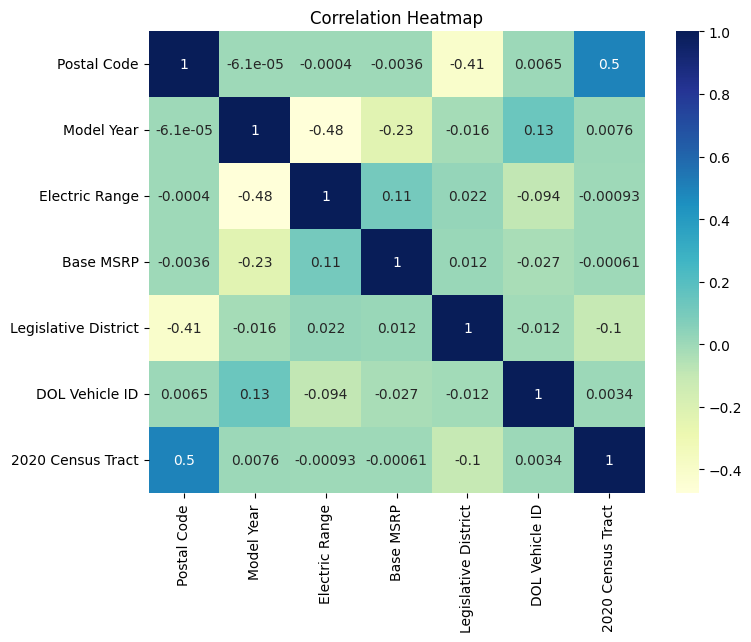

In [ ]:
# Correlation between numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Basic insights
print("\nAverage Electric Range:", round(df['Electric Range'].mean(), 2), "miles")
print("Most common manufacturer:", df['Make'].mode()[0])
print("Earliest Model Year:", df['Model Year'].min(), "| Latest Model Year:", df['Model Year'].max())


Average Electric Range: 58.84 miles
Most common manufacturer: Tesla
Earliest Model Year: 1997 | Latest Model Year: 2024


# Problem Statement

To predict the electric range and sales trends of Electric Vehicles (EVs) based on their specifications such as battery capacity, make, model year, and vehicle type.
Additionally, to build a Generative AI chatbot using GPT/Gemini APIs to provide intelligent EV insights and recommendations.

# Save Preprocessed Data

In [ ]:
df.to_csv("cleaned_ev_data.csv", index=False)
print("✅ Cleaned dataset saved successfully.")

✅ Cleaned dataset saved successfully.


# week 2 --> Train the model

In [1]:
# import dependencies
import pandas as pd
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Upload cleaned dataset in Colab before running (or mount drive)
df = pd.read_csv("cleaned_ev_data.csv").drop_duplicates().copy()

In [3]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020.0,Tesla,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023.0,Tesla,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019.0,Tesla,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016.0,Tesla,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021.0,Tesla,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38233,YV4BR0PL9J,Kitsap,Bainbridge Island,WA,98110.0,2018.0,Volvo,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,64950.0,23.0,349267670.0,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
38234,WVGUNPE22M,King,Redmond,WA,98052.0,2021.0,Volkswagen,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,187481269.0,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
38235,1FADP5CU0D,Yakima,Yakima,WA,98908.0,2013.0,Ford,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,14.0,156153910.0,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
38236,ZACPDFCW0R,King,Tukwila,WA,98188.0,2024.0,Dodge,HORNET,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,11.0,261336232.0,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [5]:
target = "Electric Range"
features = ["Model Year", "Base MSRP", "Make", "Model", "Electric Vehicle Type", "State"]
df = df.dropna(subset=[target])  # ensure no target missing


In [6]:
numeric_features = ["Model Year", "Base MSRP"]
categorical_features = ["Make", "Model", "Electric Vehicle Type", "State"]

In [7]:
# Preprocessing Steps
numeric_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_transform, numeric_features),
    ("cat", categorical_transform, categorical_features)
])

In [8]:
# Model
model = RandomForestRegressor(random_state=42)

pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", model)
])

In [9]:
# Train/Test Split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Hyperparameter tuning
param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 15, 25]
}


In [17]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [20]:
# Evaluate
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE by taking the square root of the mean squared error
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.873
RMSE: 5.875
R² Score: 0.996


In [ ]:
# Save model & metrics
os.makedirs("artifacts/models", exist_ok=True)
joblib.dump(best_model, "artifacts/models/ev_range_model.joblib")

metrics = {
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2
}
pd.Series(metrics).to_json("artifacts/metrics.json")

print("\n Files Saved:")
print("→ Model: artifacts/models/ev_range_model.joblib")
print("→ Metrics: artifacts/metrics.json")


 Files Saved:
→ Model: artifacts/models/ev_range_model.joblib
→ Metrics: artifacts/metrics.json
